#### STEPS:
        1.Reading the Data
        2.Preprocessing the data
        3.Converting target field into Category Field
        4.Normalizing the dataset for model
        5.Training the DecisionTree Model and RandomForest
        6.Visualizing the results 
        7.Model Building
          -Prouning-Pre-Prouning and Post_Prouning
          -Treating Imbalanced Data
            --Random Under Sampling
            --Random Over Sampling
            --Tomek's Link
            --SMOTE:Synthetic Minority Oversampling Technique
         8.Conclusion
            

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("D:\ExcelR Data Science\Assignments\Decision Tree\Fraud_check.csv")
df.head(25)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [3]:
df=df.rename(columns={"Marital.Status":"Marital_Status",
                   "Taxable.Income":"Taxable_Income",
                   "City.Population":"City_Population",
                   "Work.Experience":"Work_Experience"
                  })

In [4]:
df.columns

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban'],
      dtype='object')

In [5]:
df.shape

(600, 6)

In [6]:
df.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.dtypes

Undergrad          object
Marital_Status     object
Taxable_Income      int64
City_Population     int64
Work_Experience     int64
Urban              object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])
df['Urban']=le.fit_transform(df['Urban'])

In [9]:
df['Taxable_Income']=pd.cut(df["Taxable_Income"],bins=[10000,30000,99620],labels=['Risky','Good'])
#df['Work_Experience']=pd.cut(df["Work_Experience"],bins=[0,5,20,30],labels=['Entry','Managerial','Head Positions'])


In [10]:
df.head(15)

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
5,0,0,Good,116382,0,0
6,0,0,Good,80890,8,1
7,1,2,Good,131253,3,1
8,0,2,Good,102481,12,1
9,1,0,Good,155482,4,1


In [11]:
df['Taxable_Income']=le.fit_transform(df['Taxable_Income'])

In [12]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [13]:
X=df.drop('Taxable_Income',axis=1)
Y=df['Taxable_Income']

In [14]:
X.shape,Y.shape

((600, 5), (600,))

In [15]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X=sd.fit_transform(X)

In [16]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y)

In [20]:
dt = DecisionTreeClassifier(random_state = 42) #Create Instance
model=dt.fit(Xtrain, Ytrain)

In [21]:
Xtest.shape

(150, 5)

In [23]:

pred_dt=model.predict(Xtest)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,f1_score
print(confusion_matrix(Ytest, pred_dt))
print("Accuracy:\n",accuracy_score(Ytest, pred_dt))

[[83 34]
 [26  7]]
Accuracy:
 0.6


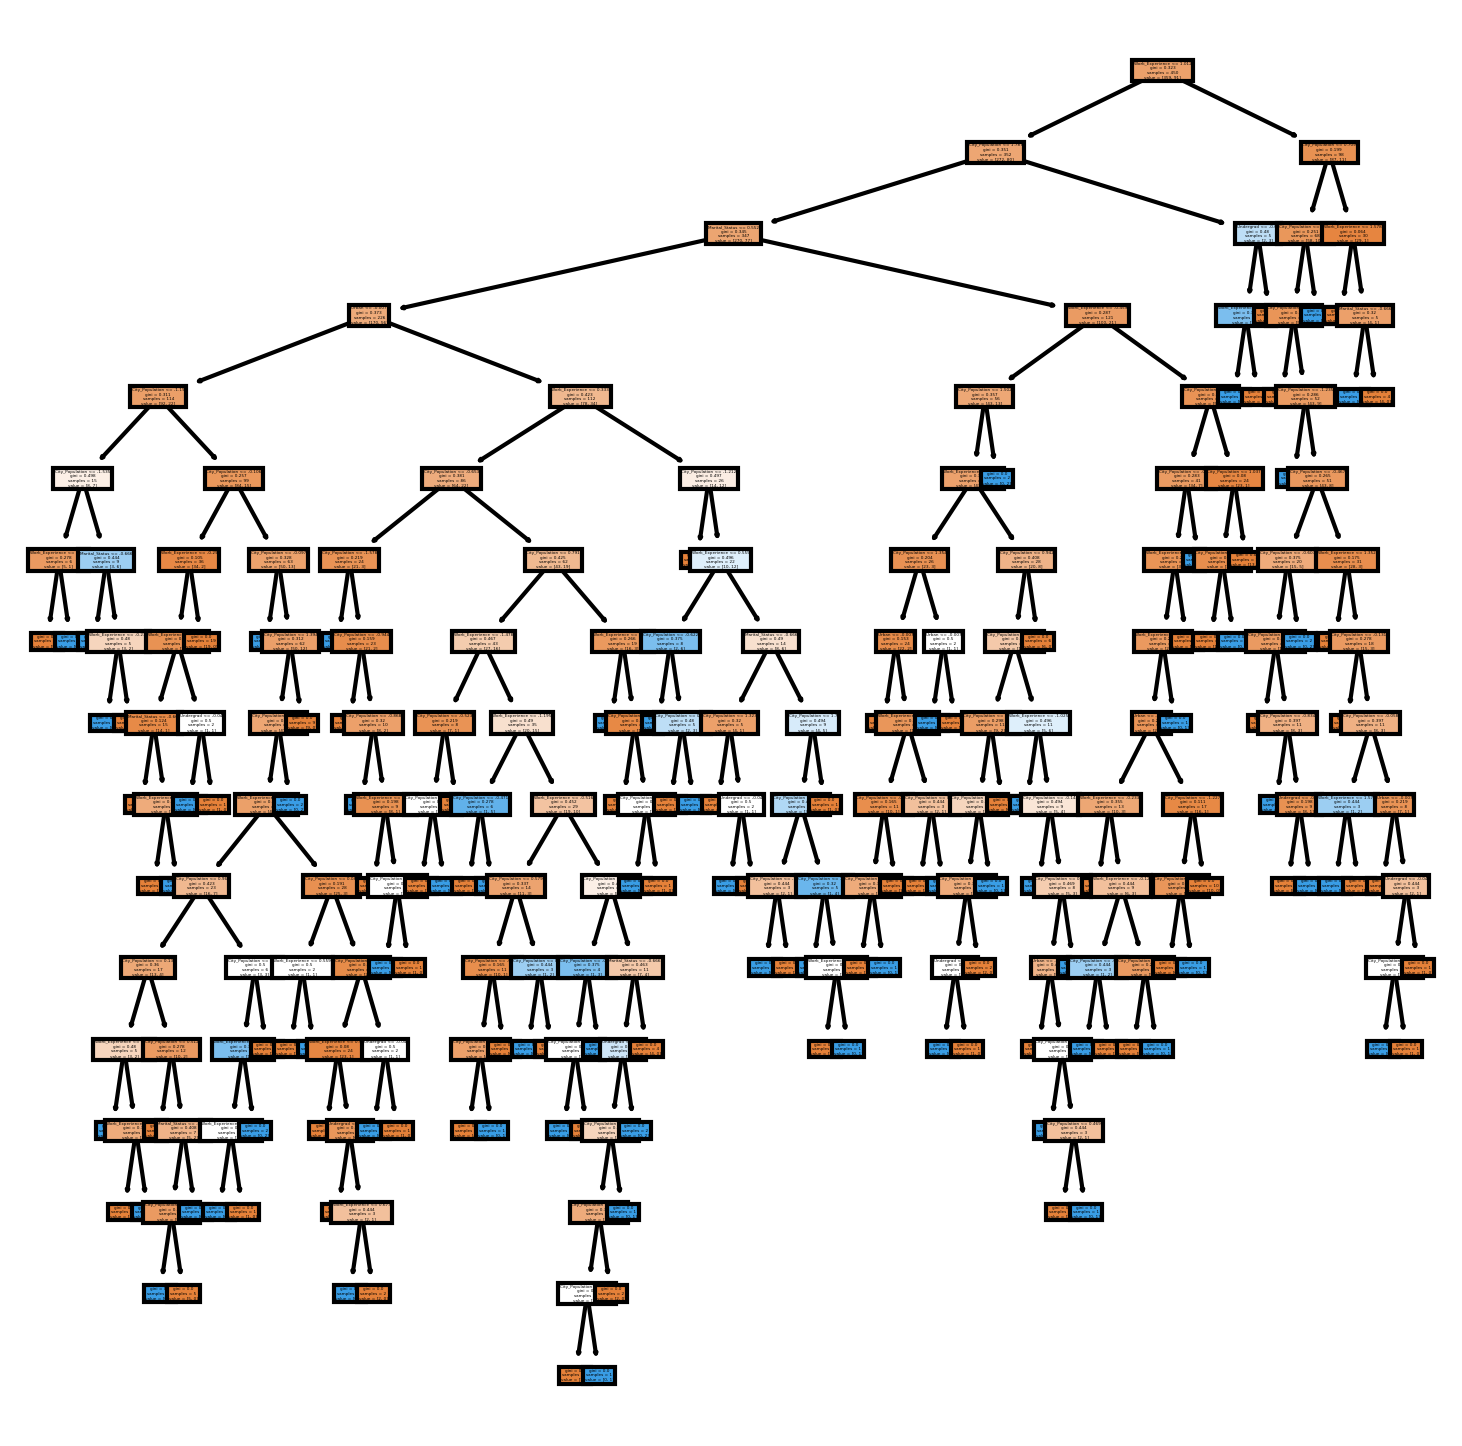

In [25]:
X1=df.drop('Taxable_Income',axis=1)
fn=X1.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,feature_names = fn,               
               filled = True);

### Graphviz Decision Tree Visualization

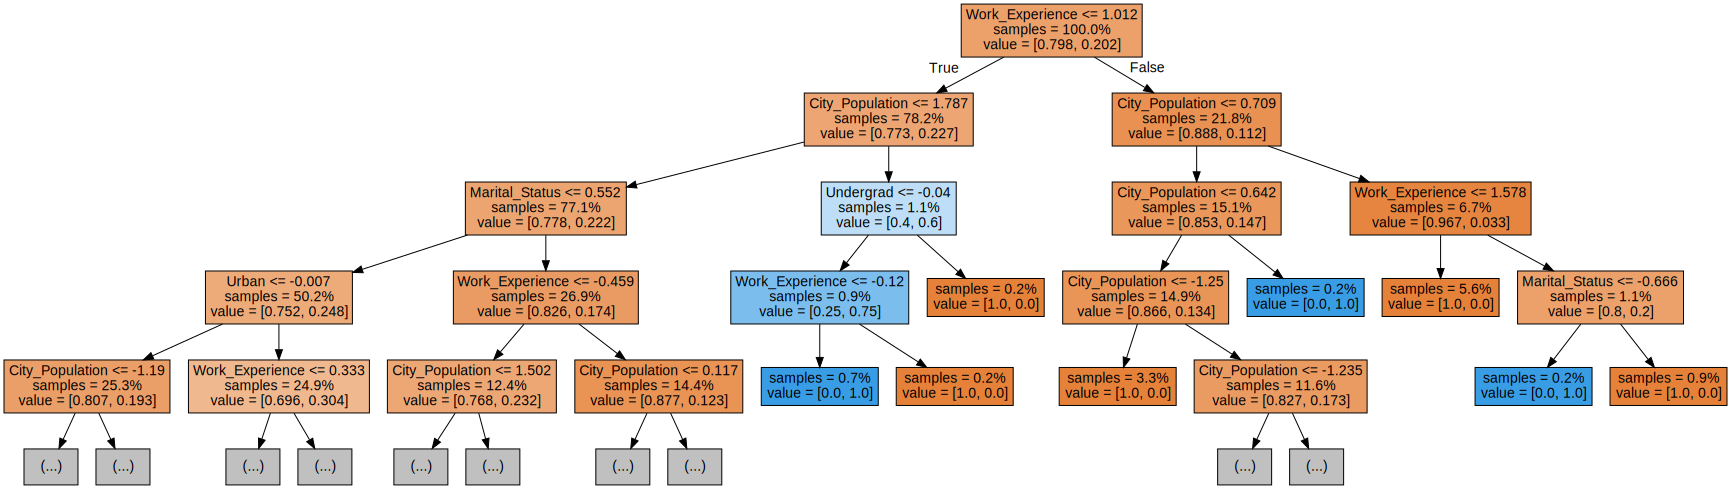

In [26]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, feature_names=X1.columns,  
                               filled=True,  
                               max_depth=4, 
                              impurity=False, 
                               proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

###  Entropy based Decision Tree


In [27]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth = 4) #Create Instance
en_model=dt.fit(Xtrain, Ytrain)
en_pred=en_model.predict(Xtest)

In [28]:
print("confusion matrix:\n",confusion_matrix(Ytest,en_pred))
print("Accuracy:\n",accuracy_score(Ytest,en_pred))

confusion matrix:
 [[117   0]
 [ 33   0]]
Accuracy:
 0.78


### Gini index based Decision tress

In [29]:
dt = DecisionTreeClassifier(criterion='gini',max_depth = 4) #Create Instance
gini_model=dt.fit(Xtrain, Ytrain)
gini_pred=gini_model.predict(Xtest)

In [30]:
print("confusion matrix:\n",confusion_matrix(Ytest,gini_pred))
print("Accuracy:\n",accuracy_score(Ytest,gini_pred))

confusion matrix:
 [[116   1]
 [ 32   1]]
Accuracy:
 0.78


# Pruning-Tree Pruning
     Pruning helps to avoid overfitting
     Any additional split that does not add significant value is not worth while.
     We can avoid overfitting by changing the parameters like
        max_leaf_nodes
        min_samples_leaf
        max_depth

In [31]:
# rebuilding the new tree
dt= DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
gini_model=dt.fit(Xtrain, Ytrain)
gini_pred=gini_model.predict(Xtest)

In [32]:
print("confusion matrix:\n",confusion_matrix(Ytest,gini_pred))
print("Accuracy:\n",accuracy_score(Ytest,gini_pred))

confusion matrix:
 [[117   0]
 [ 33   0]]
Accuracy:
 0.78


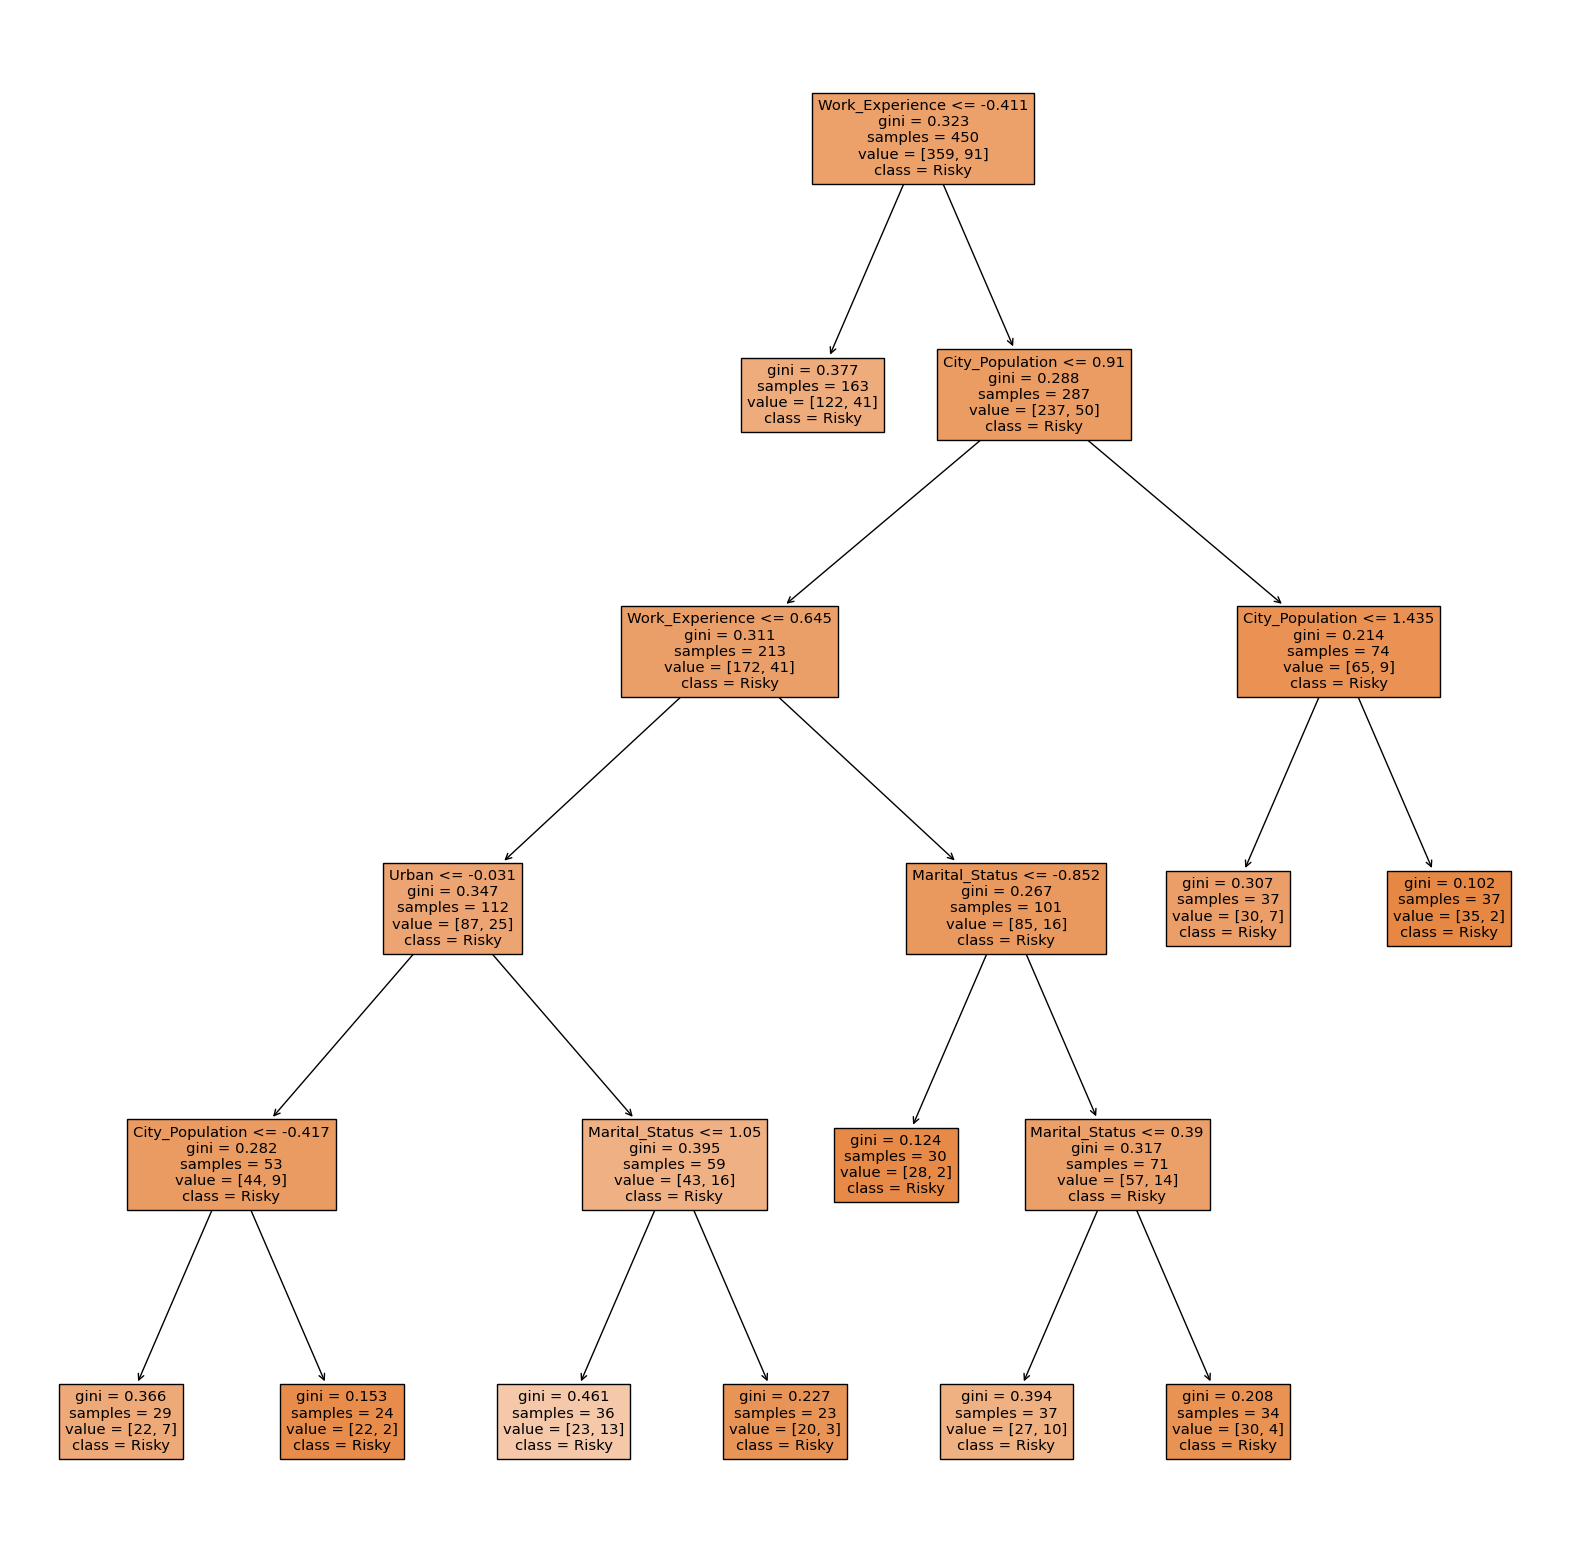

In [33]:
plt.figure(figsize=(20,20))
classes=['Risky','Good']
tree.plot_tree(gini_model,feature_names=fn,class_names=classes,filled=True)
plt.show()

### Pre-Prouning

In [34]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(Xtrain,Ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Best_Estimator: DecisionTreeClassifier(max_depth=2)
Train score 0.8
Test score 0.78


<AxesSubplot:>

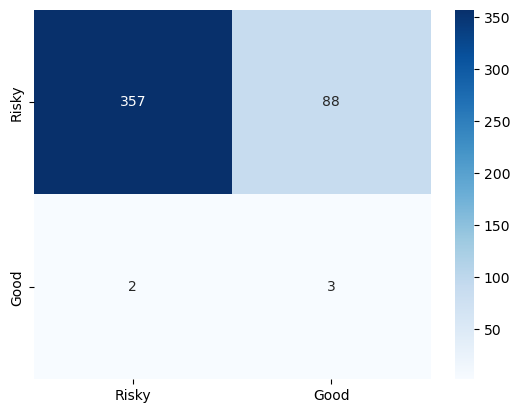

In [37]:
import seaborn as sns
model2 = gcv.best_estimator_
model2.fit(Xtrain,Ytrain)
Ytrain_pred = model2.predict(Xtrain)
Ytest_pred = model2.predict(Xtest)
print("Best_Estimator:",gcv.best_estimator_)
print(f'Train score {accuracy_score(Ytrain_pred,Ytrain)}')
print(f'Test score {accuracy_score(Ytest_pred,Ytest)}')
cf = confusion_matrix(Ytrain_pred,Ytrain)
sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')

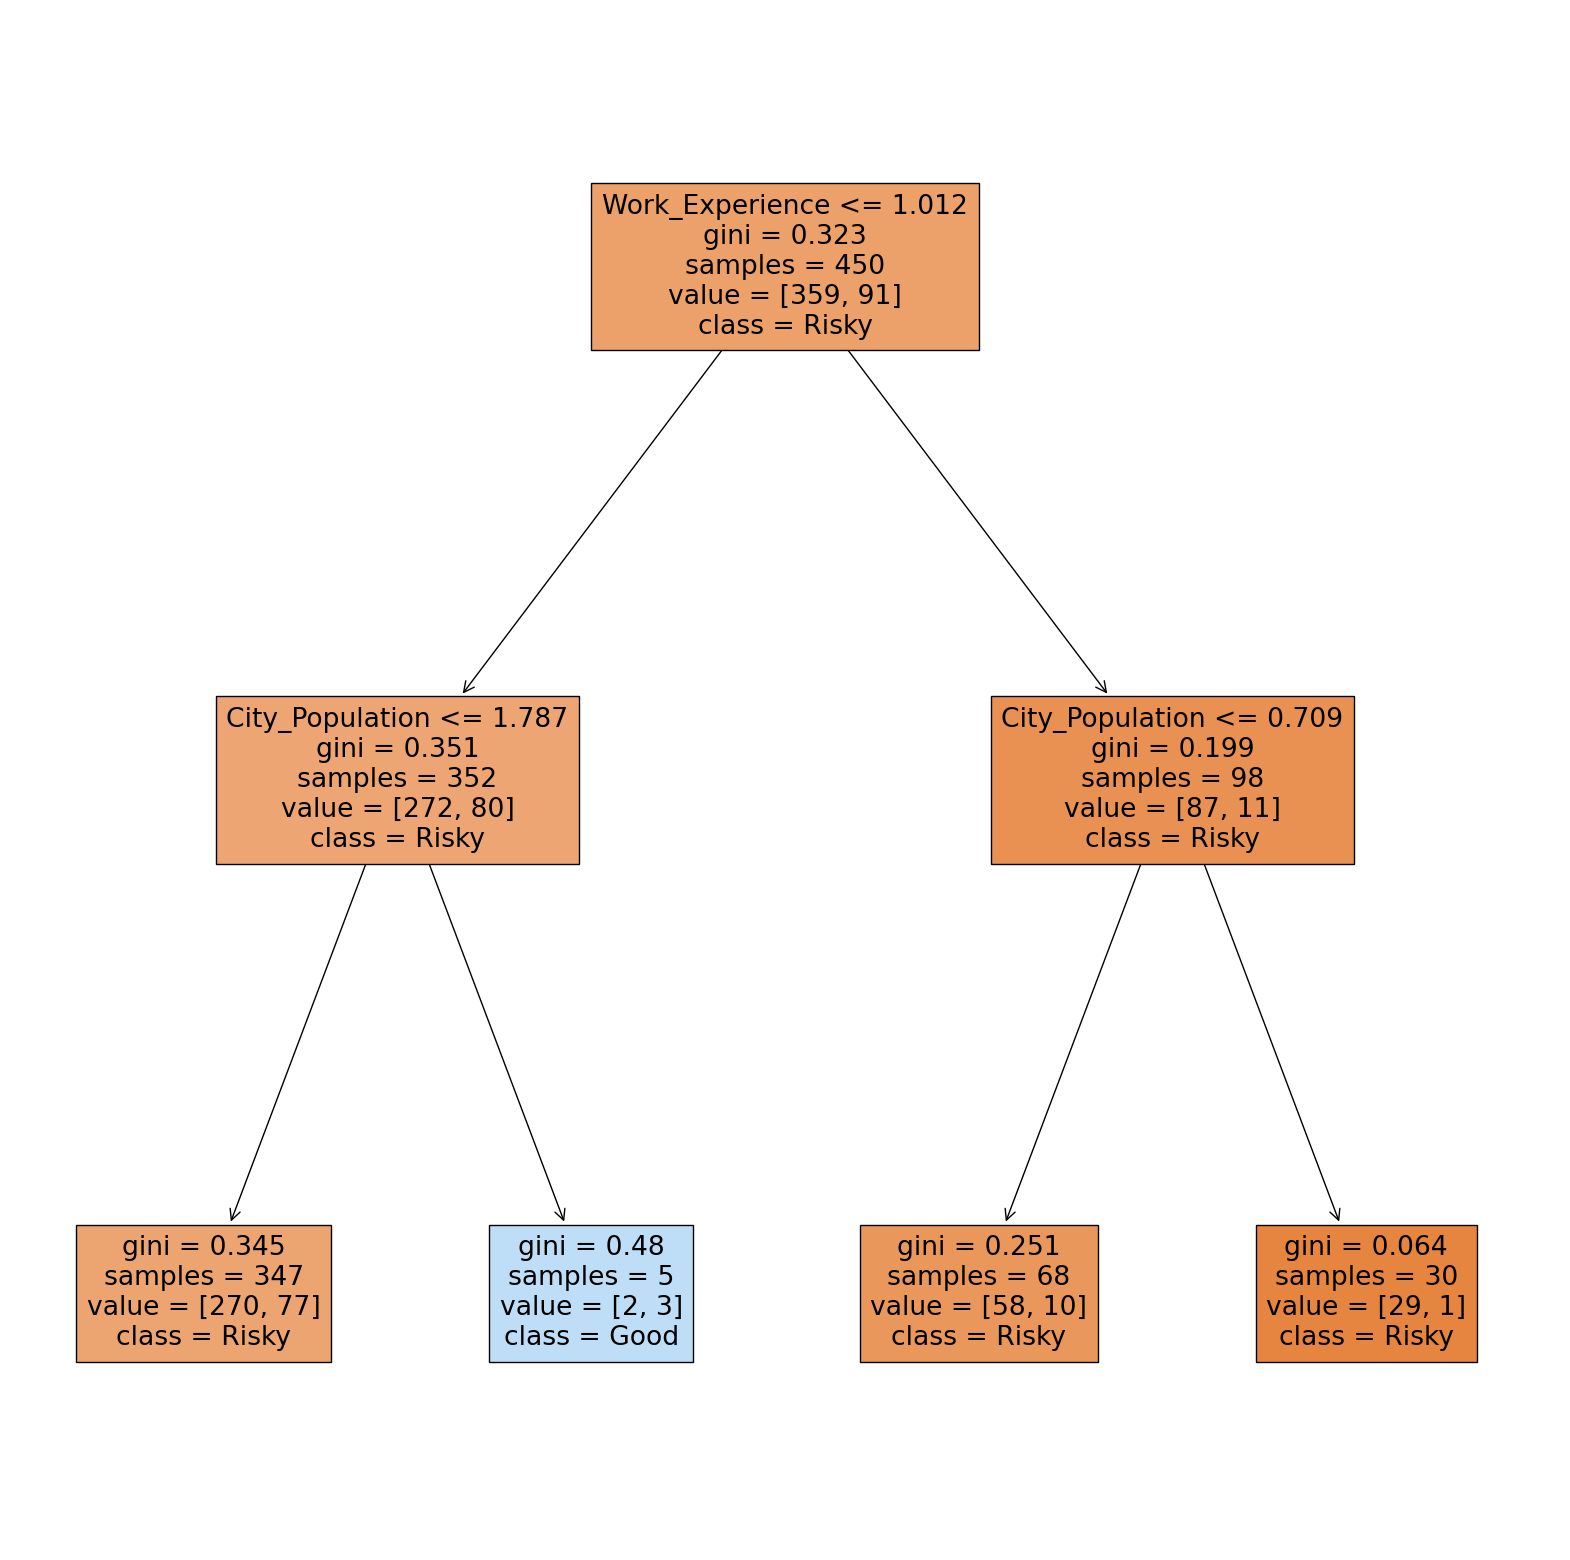

In [38]:
plt.figure(figsize=(20,20))

tree.plot_tree(model2,feature_names=fn,class_names=classes,filled=True)
plt.show()

### Post Pruning
     Prune the branches using cost_complexity_technique
     ccp_alpha give min leaf value of tree
    

In [39]:
path=clf.cost_complexity_pruning_path(Xtrain,Ytrain)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print(ccp_alphas)

[0.         0.0012963  0.00141975 0.00148148 0.00162963 0.00166667
 0.00166667 0.00166667 0.00166667 0.00167901 0.0017284  0.00177778
 0.001806   0.00182336 0.00191138 0.00194444 0.0019697  0.00197531
 0.00197531 0.002      0.0020202  0.00203853 0.00208266 0.0020915
 0.0020915  0.00212963 0.00214815 0.00217003 0.00224467 0.0022658
 0.00228571 0.00229899 0.00258041 0.00266667 0.00282011 0.00282859
 0.00300144 0.00300689 0.00311019 0.00355072 0.00364312 0.0037037
 0.0037037  0.00394331 0.00450795]


In [40]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xtrain, Ytrain)
    clfs.append(clf)

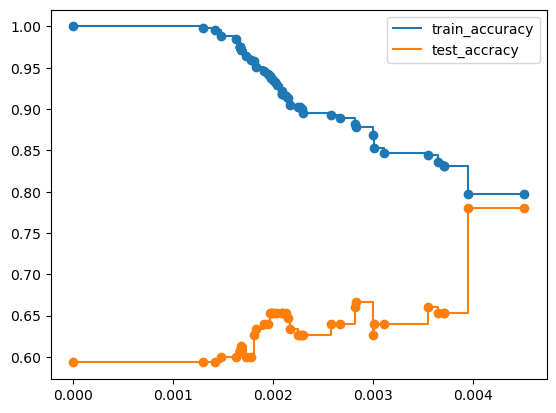

In [41]:
train_acc=[]
test_acc=[]
for c in clfs:
    ytrain_pred=c.predict(Xtrain)
    ytest_pred=c.predict(Xtest)
    train_acc.append(accuracy_score(Ytrain,ytrain_pred))
    test_acc.append(accuracy_score(Ytest,ytest_pred))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accracy',drawstyle="steps-post")
plt.legend()
plt.show()

In [42]:
clf_=DecisionTreeClassifier(random_state=0,ccp_alpha=0.004)
clf_.fit(Xtrain,Ytrain)
Ytest_pred=clf_.predict(Xtest)

In [43]:
print("Accuracy:\n",accuracy_score(Ytest,Ytest_pred))

Accuracy:
 0.78


### Random Forest Classification

In [44]:
rf=RandomForestClassifier(n_estimators=100,max_depth=3)
rf_model=rf.fit(Xtrain,Ytrain)

In [45]:
rf_pred=rf_model.predict(Xtest)

In [46]:
print("confusion matrix:\n",confusion_matrix(Ytest,rf_pred))
print("Accuracy:\n",accuracy_score(Ytest,rf_pred))

confusion matrix:
 [[117   0]
 [ 33   0]]
Accuracy:
 0.78


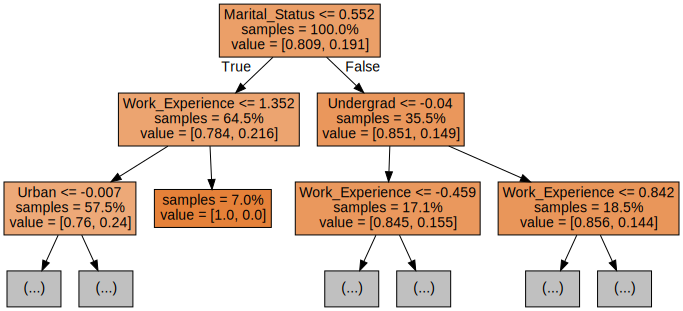

In [47]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                       feature_names=X1.columns,  
                               filled=True,  
                               max_depth=2, 
                              impurity=False, 
                               proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [48]:
clf_=RandomForestClassifier(random_state=0,ccp_alpha=0.004)
clf_.fit(Xtrain,Ytrain)
Ytest_pred=clf_.predict(Xtest)

In [49]:
rf_pred=clf_.predict(Xtest)

In [50]:
print("Accuracy:\n",accuracy_score(Ytest,Ytest_pred))

Accuracy:
 0.78


### Treating Imbalanced Data
     Random under Sampling---removing samples from majaority classes
     Random Over Sampling---add more samples from minority class
     Never Miss    


In [51]:
#class count
class_count_0,class_count_1=df['Taxable_Income'].value_counts()
print('Good:',class_count_0)
print('Risky:',class_count_1)
class_0=df[df['Taxable_Income']==0]
class_1=df[df['Taxable_Income']==1]
print('class_0',class_0.shape)
print('class_1',class_1.shape)

Good: 476
Risky: 124
class_0 (476, 6)
class_1 (124, 6)


#### 1.Random Under Sampling
    removing some observations of the majority class
    
 

total class of 1 and 0:
 0    124
1    124
Name: Taxable_Income, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

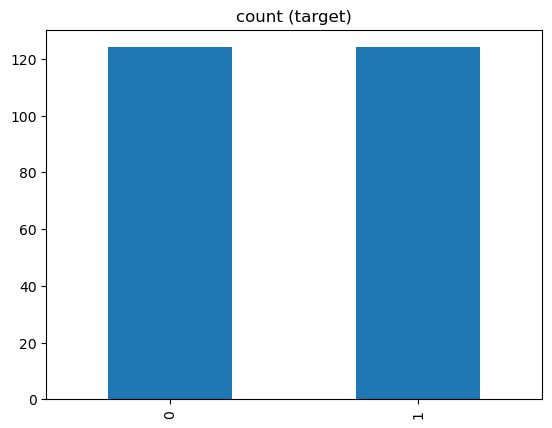

In [52]:
class_0_under=class_0.sample(class_count_1)
test_under=pd.concat([class_0_under,class_1],axis=0)

print("total class of 1 and 0:\n",test_under['Taxable_Income'].value_counts())# plot the count after under-sampeling
test_under['Taxable_Income'].value_counts().plot(kind='bar', title='count (target)')

#### 2.Random Over Sampling
    adding some observations of the minority class
    
 

total class of 1 and 0:
 1    476
0    476
Name: Taxable_Income, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

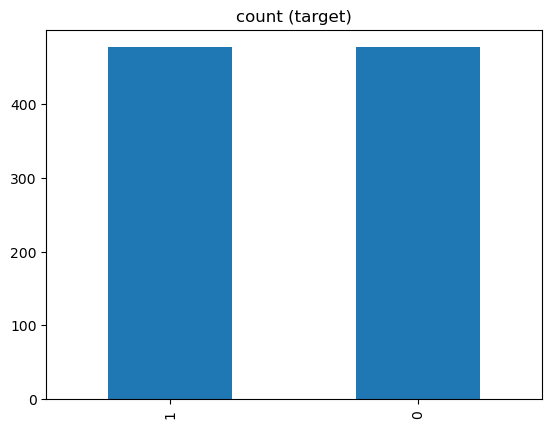

In [53]:
class_1_over=class_1.sample(class_count_0,replace=True)
test_over=pd.concat([class_1_over,class_0],axis=0)

print("total class of 1 and 0:\n",test_over['Taxable_Income'].value_counts())# plot the count after under-sampeling
test_over['Taxable_Income'].value_counts().plot(kind='bar', title='count (target)')

### 3.Balance data with imblearn python module
     import imblearn

In [54]:
#!pip install imblearn

In [55]:

# Random under sampling using imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X, Y)

print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 476, 1: 124})
Resample dataset shape Counter({0: 124, 1: 124})


In [56]:
# DecisionTree Classifier
X_train,X_test,Y_train,Y_test=train_test_split(x_rus,y_rus)
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)
pred1=dtree.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred1))
print('ROCAUC score:',roc_auc_score(Y_test, pred1))
print('F1 score:',f1_score(Y_test,pred1))

Accuracy:
 0.5483870967741935
ROCAUC score: 0.5527690700104493
F1 score: 0.5333333333333333


In [57]:
#RandomFrorest Classifier
rf1=RandomForestClassifier(random_state=42)
rf1.fit(X_train,Y_train)
pred1=rf1.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred1))
print('ROCAUC score:',roc_auc_score(Y_test, pred1))
print('F1 score:',f1_score(Y_test,pred1))

Accuracy:
 0.46774193548387094
ROCAUC score: 0.47074190177638453
F1 score: 0.4590163934426229


In [58]:
# Random over sampling using imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, Y)

print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({0: 476, 1: 124})
Resample dataset shape Counter({0: 476, 1: 476})


In [59]:
#DEcisionTree Classifier
X_train,X_test,Y_train,Y_test=train_test_split(x_ros,y_ros)
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)
pred2=dtree.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred2))
print('ROCAUC score:',roc_auc_score(Y_test, pred2))
print('F1 score:',f1_score(Y_test,pred2))

Accuracy:
 0.8361344537815126
ROCAUC score: 0.8386800452232899
F1 score: 0.8482490272373541


In [60]:
#RandomFrorest Classifier
rf1=RandomForestClassifier(random_state=42)
rf1.fit(X_train,Y_train)
pred1=rf1.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred1))
print('ROCAUC score:',roc_auc_score(Y_test, pred1))
print('F1 score:',f1_score(Y_test,pred1))

Accuracy:
 0.865546218487395
ROCAUC score: 0.8671565856416054
F1 score: 0.8709677419354839


#### 4.Under-sampling: Tomek links
     Tomek links are pairs of very close instances but of opposite classes. 
     Tomek’s link exists if the two samples are the nearest neighbors of each other

In [61]:
# import library
from imblearn.under_sampling import TomekLinks

tlink = RandomOverSampler(sampling_strategy=0.9)

x_tlink, y_tlink= tlink.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_tlink))


Original dataset shape Counter({0: 476, 1: 124})
Resample dataset shape Counter({0: 476, 1: 428})


In [62]:
#DEcisionTree Classifier
X_train,X_test,Y_train,Y_test=train_test_split(x_tlink,y_tlink)
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)
pred2=dtree.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred2))
print('ROCAUC score:',roc_auc_score(Y_test, pred2))
print('F1 score:',f1_score(Y_test,pred2))

Accuracy:
 0.8141592920353983
ROCAUC score: 0.8159811985898942
F1 score: 0.8292682926829269


In [63]:
#RandomFrorest Classifier
rf1=RandomForestClassifier(random_state=42)
rf1.fit(X_train,Y_train)
pred1=rf1.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred1))
print('ROCAUC score:',roc_auc_score(Y_test, pred1))
print('F1 score:',f1_score(Y_test,pred1))

Accuracy:
 0.8672566371681416
ROCAUC score: 0.8683117900509204
F1 score: 0.8728813559322033


#### 5.SMOTE : Synthetic Minority Oversampling Technique
      randomly picking a point from the minority class and computing the k-nearest neighbors for this point

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 476, 1: 124})
Resample dataset shape Counter({0: 476, 1: 476})


In [65]:
#DEcisionTree Classifier
X_train,X_test,Y_train,Y_test=train_test_split(x_smote,y_smote)
dtree=DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)
pred2=dtree.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred2))
print('ROCAUC score:',roc_auc_score(Y_test, pred2))
print('F1 score:',f1_score(Y_test,pred2))

Accuracy:
 0.6638655462184874
ROCAUC score: 0.6629229356502084
F1 score: 0.6396396396396397


In [66]:
#RandomFrorest Classifier
rf1=RandomForestClassifier(random_state=42)
rf1.fit(X_train,Y_train)
pred1=rf1.predict(X_test)
print("Accuracy:\n",accuracy_score(Y_test,pred1))
print('ROCAUC score:',roc_auc_score(Y_test, pred1))
print('F1 score:',f1_score(Y_test,pred1))

Accuracy:
 0.7100840336134454
ROCAUC score: 0.7097902097902098
F1 score: 0.7012987012987013


##### We can see from result, Random over sampling technique gives the best accuarcy result with RandomForestClassifier with 88% of Accuracy